In [114]:
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_context('notebook')

facebook = pd.read_csv('DATA/dataset_Facebook.csv', delimiter=";")


In [4]:
facebook.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
Page total likes                                                       500 non-null int64
Type                                                                   500 non-null object
Category                                                               500 non-null int64
Post Month                                                             500 non-null int64
Post Weekday                                                           500 non-null int64
Post Hour                                                              500 non-null int64
Paid                                                                   499 non-null float64
Lifetime Post Total Reach                                              500 non-null int64
Lifetime Post Total Impressions                                        500 non-null int64
Lifetime Engaged Users                                                 500 non-nul

In [5]:
facebook.describe()

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
count,500.000000,500.000000,500.000000,500.000000,500.000000,499.000000,500.00000,5.000000e+02,500.000000,500.000000,500.000000,5.000000e+02,500.000000,500.000000,500.00000,499.000000,496.000000,500.000000
mean,123194.176000,1.880000,7.038000,4.150000,7.840000,0.278557,13903.36000,2.958595e+04,920.344000,798.772000,1415.130000,1.676638e+04,6585.488000,609.986000,7.48200,177.945892,27.266129,212.120000
std,16272.813214,0.852675,3.307936,2.030701,4.368589,0.448739,22740.78789,7.680325e+04,985.016636,882.505013,2000.594118,5.979102e+04,7682.009405,612.725618,21.18091,323.398742,42.613292,380.233118
min,81370.000000,1.000000,1.000000,1.000000,1.000000,0.000000,238.00000,5.700000e+02,9.000000,9.000000,9.000000,5.670000e+02,236.000000,9.000000,0.00000,0.000000,0.000000,0.000000
25%,112676.000000,1.000000,4.000000,2.000000,3.000000,0.000000,3315.00000,5.694750e+03,393.750000,332.500000,509.250000,3.969750e+03,2181.500000,291.000000,1.00000,56.500000,10.000000,71.000000
50%,129600.000000,2.000000,7.000000,4.000000,9.000000,0.000000,5281.00000,9.051000e+03,625.500000,551.500000,851.000000,6.255500e+03,3417.000000,412.000000,3.00000,101.000000,19.000000,123.500000
75%,136393.000000,3.000000,10.000000,6.000000,11.000000,1.000000,13168.00000,2.208550e+04,1062.000000,955.500000,1463.000000,1.486050e+04,7989.000000,656.250000,7.00000,187.500000,32.250000,228.500000
max,139441.000000,3.000000,12.000000,7.000000,23.000000,1.000000,180480.00000,1.110282e+06,11452.000000,11328.000000,19779.000000,1.107833e+06,51456.000000,4376.000000,372.00000,5172.000000,790.000000,6334.000000


In [3]:
facebook.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


-254

In [4]:
facebook.columns

Index(['Page total likes', 'Type', 'Category', 'Post Month', 'Post Weekday',
       'Post Hour', 'Paid', 'Lifetime Post Total Reach',
       'Lifetime Post Total Impressions', 'Lifetime Engaged Users',
       'Lifetime Post Consumers', 'Lifetime Post Consumptions',
       'Lifetime Post Impressions by people who have liked your Page',
       'Lifetime Post reach by people who like your Page',
       'Lifetime People who have liked your Page and engaged with your post',
       'comment', 'like', 'share', 'Total Interactions'],
      dtype='object')

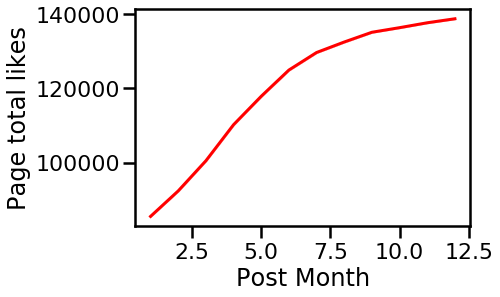

In [95]:
sns.lineplot('Post Month','Page total likes', data=facebook, ci=False, color='r')
# sns.distplot(facebook['Page total likes'], hist_kws={'cumulative':True} )

In [135]:
facebook[['Lifetime Post Total Reach',  'Lifetime Post Consumptions','Lifetime Post Total Impressions', 'Lifetime Engaged Users',
       'Lifetime Post Consumers', 'Lifetime Post Consumptions',
       'Lifetime Post Impressions by people who have liked your Page',
       'Lifetime Post reach by people who like your Page',
       'Lifetime People who have liked your Page and engaged with your post',
       'comment', 'like', 'share', 'Total Interactions' ]].corr()

,Lifetime Post Total Reach,Lifetime Post Consumptions,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
Lifetime Post Total Reach,1.000000,0.324362,0.694926,0.570629,0.477908,0.324362,0.322254,0.743053,0.400756,0.427155,0.545185,0.456312,0.538597
Lifetime Post Consumptions,0.324362,1.000000,0.226081,0.676840,0.706666,1.000000,0.164813,0.355389,0.577262,0.261195,0.235634,0.201300,0.238082
Lifetime Post Total Impressions,0.694926,0.226081,1.000000,0.368553,0.315201,0.226081,0.850787,0.651933,0.323843,0.316612,0.345091,0.286829,0.343358
Lifetime Engaged Users,0.570629,0.676840,0.368553,1.000000,0.968213,0.676840,0.260346,0.612080,0.839279,0.505806,0.569565,0.531261,0.572159
Lifetime Post Consumers,0.477908,0.706666,0.315201,0.968213,1.000000,0.706666,0.222941,0.503847,0.813510,0.334621,0.349152,0.343048,0.354502
Lifetime Post Consumptions,0.324362,1.000000,0.226081,0.676840,0.706666,1.000000,0.164813,0.355389,0.577262,0.261195,0.235634,0.201300,0.238082
Lifetime Post Impressions by people who have liked your Page,0.322254,0.164813,0.850787,0.260346,0.222941,0.164813,1.000000,0.584225,0.309800,0.242484,0.253129,0.189361,0.250083
Lifetime Post reach by people who like your Page,0.743053,0.355389,0.651933,0.612080,0.503847,0.355389,0.584225,1.000000,0.648701,0.472351,0.631524,0.486661,0.617929
Lifetime People who have liked your Page and engaged with your post,0.400756,0.577262,0.323843,0.839279,0.813510,0.577262,0.309800,0.648701,1.000000,0.425945,0.493110,0.439368,0.492570
comment,0.427155,0.261195,0.316612,0.505806,0.334621,0.261195,0.242484,0.472351,0.425945,1.000000,0.837871,0.868337,0.864944


In [134]:
facebook.columns

Index(['Page total likes', 'Type', 'Category', 'Post Month', 'Post Weekday',
       'Post Hour', 'Paid', 'Lifetime Post Total Reach',
       'Lifetime Post Total Impressions', 'Lifetime Engaged Users',
       'Lifetime Post Consumers', 'Lifetime Post Consumptions',
       'Lifetime Post Impressions by people who have liked your Page',
       'Lifetime Post reach by people who like your Page',
       'Lifetime People who have liked your Page and engaged with your post',
       'comment', 'like', 'share', 'Total Interactions'],
      dtype='object')

In [73]:
facebook.columns

Index(['Page total likes', 'Type', 'Category', 'Post Month', 'Post Weekday',
       'Post Hour', 'Paid', 'Lifetime Post Total Reach',
       'Lifetime Post Total Impressions', 'Lifetime Engaged Users',
       'Lifetime Post Consumers', 'Lifetime Post Consumptions',
       'Lifetime Post Impressions by people who have liked your Page',
       'Lifetime Post reach by people who like your Page',
       'Lifetime People who have liked your Page and engaged with your post',
       'comment', 'like', 'share', 'Total Interactions'],
      dtype='object')

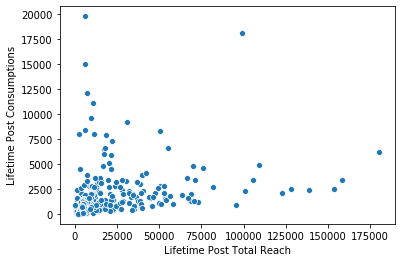

In [46]:
sns.scatterplot('Lifetime Post Total Reach',  'Lifetime Post Consumptions', data=facebook)

In [48]:
    facebook['Lifetime Post Consumptions'].describe()

count      500.000000
mean      1415.130000
std       2000.594118
min          9.000000
25%        509.250000
50%        851.000000
75%       1463.000000
max      19779.000000
Name: Lifetime Post Consumptions, dtype: float64

([<matplotlib.axis.XTick at 0x1a892e8c08>,
 <a list of 12 Text xticklabel objects>)

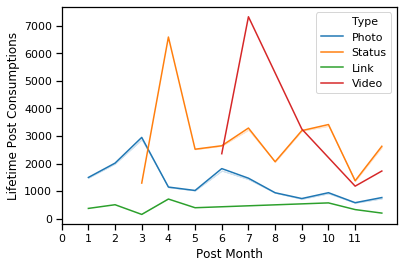

In [180]:
months=['j','f','m','a','m','j','j','a','s','o','n','d']
sns.lineplot('Post Month','Lifetime Post Consumptions', data=facebook, ci=False, hue='Type',estimator='mean')
# plt.sticks(np.arange(1,12,1))
plt.xticks(np.arange(0, 12, 1))



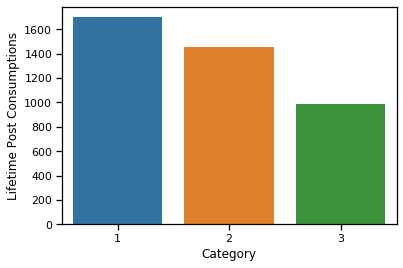

In [178]:
xtick=['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D']
sns.barplot('Category','Lifetime Post Consumptions', data=facebook, ci=False)
# plt.xlabel('Post Month')

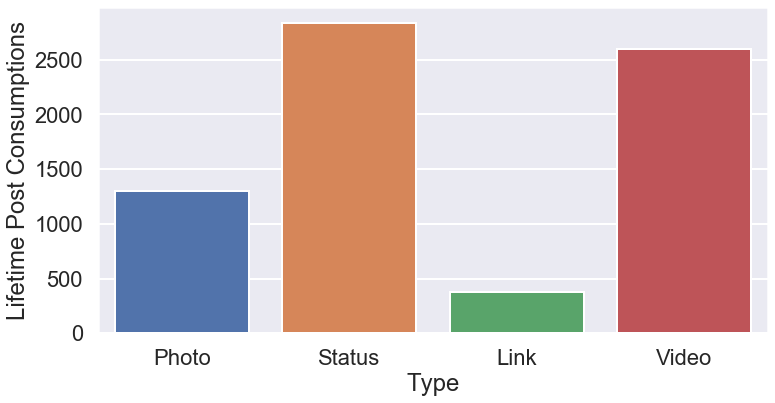

In [212]:
sns.set_context('poster')

sns.barplot('Type','Lifetime Post Consumptions', data=facebook, ci=False, estimator=np.mean, saturation=0.9)
# plt.title('Lifetime Post Consumption Per Type')
plt.savefig(r'C:\Users\Jalal\Desktop\Programing\wkdir\git7\INTRO-TO-DATA-ANALYSIS\DATA\Facebook_plot.jpg')


# sns.despine()

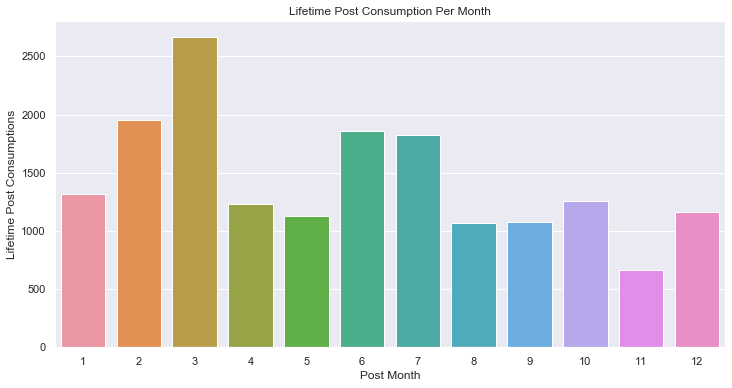

In [204]:
sns.set(rc={'figure.figsize': (12,6)})
sns.barplot('Post Month','Lifetime Post Consumptions', data=facebook, ci=False)
plt.title('Lifetime Post Consumption Per Month')
plt.savefig(r'C:\Users\Jalal\Desktop\Programing\wkdir\git7\INTRO-TO-DATA-ANALYSIS\DATA\Facebook_plot1.jpg')


In [193]:
# sns.barplot('Paid','Lifetime Post Consumptions', data=facebook, ci=False)


In [192]:
facebook.groupby('Paid')['Lifetime Post Consumptions'].agg(['mean', 'max','min', 'count'])

,mean,max,min,count
Paid,,,,
0.0,1295.333333,14974,19,360
1.0,1730.230216,19779,9,139


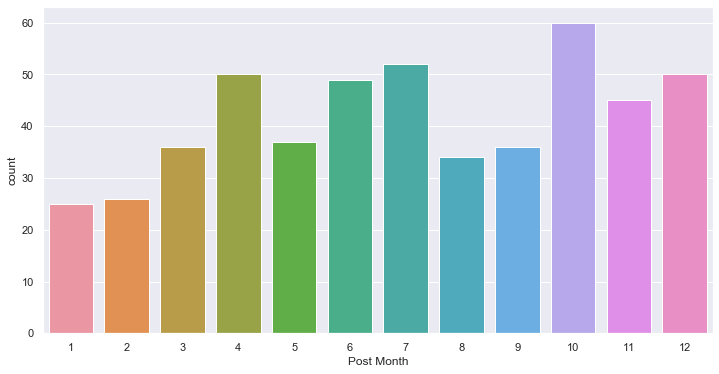

In [188]:
# sns.barplot('Post Month','Total Interactions', data=facebook, ci=False)
sns.countplot('Post Month', data=facebook)


In [181]:
# sns.barplot('Post Month','Lifetime Post Consumptions',hue='Type', data=facebook, ci=False)
# sns.barplot('Type', data=facebook)
# list(plt.style.available)
x_index=np.arange(len(facebook['Post Weekday']))
# x_index

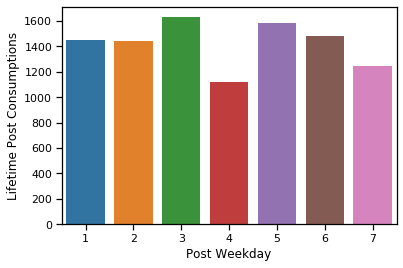

In [161]:
days=['Sunday','Monday', 'Tuesday','Wednesday', 'Thursday', 'Friday', 'Saturday']

sns.barplot('Post Weekday','Lifetime Post Consumptions', data=facebook, ci=False)
# plt.xticks( ticks=facebook['Post Weekday'],labels=days, rotation =90)
# plt.xlabel(days)
# plt.xticks(np.arange(len(days)))


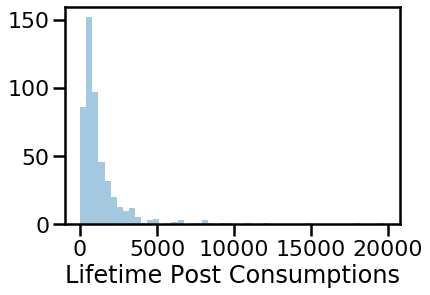

In [97]:
sns.distplot(facebook['Lifetime Post Consumptions'], kde=False)


In [56]:
facebook.columns

Index(['Page total likes', 'Type', 'Category', 'Post Month', 'Post Weekday',
       'Post Hour', 'Paid', 'Lifetime Post Total Reach',
       'Lifetime Post Total Impressions', 'Lifetime Engaged Users',
       'Lifetime Post Consumers', 'Lifetime Post Consumptions',
       'Lifetime Post Impressions by people who have liked your Page',
       'Lifetime Post reach by people who like your Page',
       'Lifetime People who have liked your Page and engaged with your post',
       'comment', 'like', 'share', 'Total Interactions'],
      dtype='object')

In [62]:
facebook.Type.unique()

array(['Photo', 'Status', 'Link', 'Video'], dtype=object)

In [63]:
facebook.Category.unique()

array([2, 3, 1], dtype=int64)

In [88]:
facebook.columns

Index(['Page total likes', 'Type', 'Category', 'Post Month', 'Post Weekday',
       'Post Hour', 'Paid', 'Lifetime Post Total Reach',
       'Lifetime Post Total Impressions', 'Lifetime Engaged Users',
       'Lifetime Post Consumers', 'Lifetime Post Consumptions',
       'Lifetime Post Impressions by people who have liked your Page',
       'Lifetime Post reach by people who like your Page',
       'Lifetime People who have liked your Page and engaged with your post',
       'comment', 'like', 'share', 'Total Interactions'],
      dtype='object')

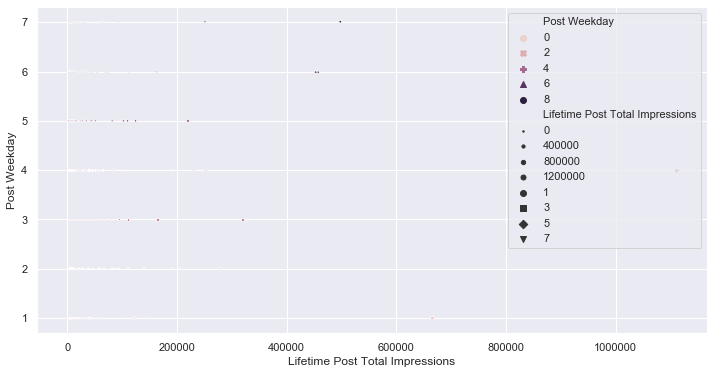

In [196]:
ax = sns.scatterplot( y = 'Post Weekday', x = 'Lifetime Post Total Impressions', data = facebook, hue = 'Post Weekday', style = 'Post Weekday',
                    size = 'Lifetime Post Total Impressions', sizes = (2, 25))
